Realiza una peticion a un Web Map Service (WMS) con unas coordenadas indicadas
- El usuario indica las coordenadas
- Se crea una bounding box de una distancia de 100m (se puede ampliar) -> hay que tener en cuenta que esto sería la resolución de la img
- Se realiza la petición al WMS con esa BBox -> el WMS seleccionado es el PNOA de maxima actualidad
- Se descarga la img satelital en RGB

/usr/local/lib/python3.11/dist-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.11/dist-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-1-5916fbb24fc0>:16: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x_center, y_center = transform(proj_4326, proj_2583

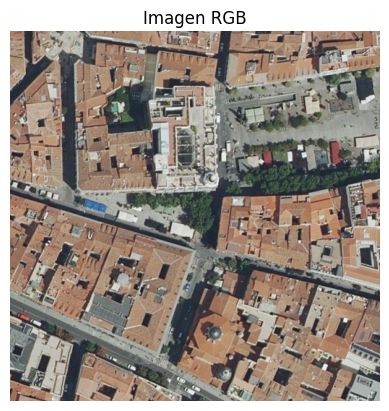

In [1]:
import requests
from PIL import Image
from io import BytesIO
from pyproj import Proj, transform
import matplotlib.pyplot as plt

# Punto central en EPSG:4326 (latitud, longitud)
lat, lon = 40.4143, -3.7015
buffer_m = 100  # Distancia alrededor del punto en metros

# Definir proyecciones
proj_4326 = Proj(init="epsg:4326")    # WGS84
proj_25830 = Proj(init="epsg:25830")  # UTM zona 30N

# Convertir punto a EPSG:25830
x_center, y_center = transform(proj_4326, proj_25830, lon, lat)

# Calcular bbox en metros
min_x = x_center - buffer_m
max_x = x_center + buffer_m
min_y = y_center - buffer_m
max_y = y_center + buffer_m
bbox_25830 = [min_x, min_y, max_x, max_y]

# Parámetros para la solicitud WMS
wms_url = "https://www.ign.es/wms-inspire/pnoa-ma"
params = {
    "service": "WMS",
    "request": "GetMap",
    "version": "1.3.0",
    "layers": "OI.OrthoimageCoverage",
    "styles": "",
    "format": "image/png",
    "crs": "EPSG:25830",
    "bbox": ",".join(map(str, bbox_25830)),
    "width": 512,
    "height": 512,
    "transparent": "true"
}

# Realizar la solicitud
response = requests.get(wms_url, params=params)

# Comprobar la respuesta
if response.status_code == 200:
    img = Image.open(BytesIO(response.content)).convert("RGB")
    img.save("sat_image.png")
    plt.imshow(img)
    plt.title("Imagen RGB")
    plt.axis('off')
    plt.show()
else:
    print("Error en la solicitud WMS:", response.status_code)


Se muestra un mapa en el que el usuario puede hacer click y en coords se guardan las coordenadas como latitud y longitud

In [16]:
from ipyleaflet import Map, Marker
from IPython.display import display

coords = []

def handle_click(**kwargs):
    if kwargs.get('type') == 'click':
        latlng = kwargs.get('coordinates')
        coords.append(latlng)  # Guardamos las coordenadas
        print(f"Coordenadas guardadas: {latlng}")

# Crear mapa
m = Map(center=(40.4168, -3.7038), zoom=6)
m.on_interaction(handle_click)
display(m)


Map(center=[40.4168, -3.7038], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

Coordenadas guardadas: [40.416910513739424, -3.7034654617309575]


In [17]:
coords[0][0]

40.416910513739424

In [18]:
coords[0][1]

-3.7034654617309575

Usando las coordenadas marcadas en el mapa (ojo que si se vuelve a hacer click en el mapa, guarda las nuevas coordenadas y elimina las actuales)

/usr/local/lib/python3.11/dist-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.11/dist-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-24-4e17b899beea>:10: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x_center, y_center = transform(proj_4326, proj_258

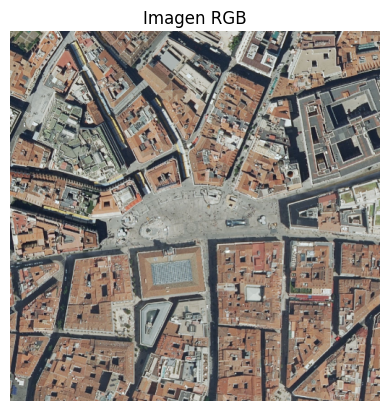

In [24]:
lat =  coords[0][0]
lon =  coords[0][1]
buffer_m = 200  # Distancia alrededor del punto en metros

# Definir proyecciones
proj_4326 = Proj(init="epsg:4326")    # WGS84
proj_25830 = Proj(init="epsg:25830")  # UTM zona 30N

# Convertir punto a EPSG:25830
x_center, y_center = transform(proj_4326, proj_25830, lon, lat)

# Calcular bbox en metros
min_x = x_center - buffer_m
max_x = x_center + buffer_m
min_y = y_center - buffer_m
max_y = y_center + buffer_m
bbox_25830 = [min_x, min_y, max_x, max_y]

# Parámetros para la solicitud WMS
wms_url = "https://www.ign.es/wms-inspire/pnoa-ma"
params = {
    "service": "WMS",
    "request": "GetMap",
    "version": "1.3.0",
    "layers": "OI.OrthoimageCoverage",
    "styles": "",
    "format": "image/png",
    "crs": "EPSG:25830",
    "bbox": ",".join(map(str, bbox_25830)),
    "width": 512,
    "height": 512,
    "transparent": "true"
}

# Realizar la solicitud
response = requests.get(wms_url, params=params)

# Comprobar la respuesta
if response.status_code == 200:
    img = Image.open(BytesIO(response.content)).convert("RGB")
    img.save("sat_image.png")
    plt.imshow(img)
    plt.title("Imagen RGB")
    plt.axis('off')
    plt.show()
else:
    print("Error en la solicitud WMS:", response.status_code)

Ejemplo del cambio de tamaño del buffer y como afecta

/usr/local/lib/python3.11/dist-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.11/dist-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-25-c9c53b8647d6>:10: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x_center, y_center = transform(proj_4326, proj_258

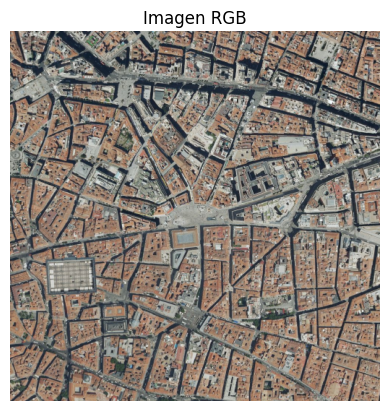

In [25]:
lat =  coords[0][0]
lon =  coords[0][1]
buffer_m = 500  # Distancia alrededor del punto en metros

# Definir proyecciones
proj_4326 = Proj(init="epsg:4326")    # WGS84
proj_25830 = Proj(init="epsg:25830")  # UTM zona 30N

# Convertir punto a EPSG:25830
x_center, y_center = transform(proj_4326, proj_25830, lon, lat)

# Calcular bbox en metros
min_x = x_center - buffer_m
max_x = x_center + buffer_m
min_y = y_center - buffer_m
max_y = y_center + buffer_m
bbox_25830 = [min_x, min_y, max_x, max_y]

# Parámetros para la solicitud WMS
wms_url = "https://www.ign.es/wms-inspire/pnoa-ma"
params = {
    "service": "WMS",
    "request": "GetMap",
    "version": "1.3.0",
    "layers": "OI.OrthoimageCoverage",
    "styles": "",
    "format": "image/png",
    "crs": "EPSG:25830",
    "bbox": ",".join(map(str, bbox_25830)),
    "width": 512,
    "height": 512,
    "transparent": "true"
}

# Realizar la solicitud
response = requests.get(wms_url, params=params)

# Comprobar la respuesta
if response.status_code == 200:
    img = Image.open(BytesIO(response.content)).convert("RGB")
    img.save("sat_image.png")
    plt.imshow(img)
    plt.title("Imagen RGB")
    plt.axis('off')
    plt.show()
else:
    print("Error en la solicitud WMS:", response.status_code)

🌍 Motivaciones para aplicar segmentación de carreteras en imágenes satelitales


🚗 1. Automatización del mapeo vial
- Tradicionalmente, el trazado de carreteras en mapas se hace manualmente.

- Usar segmentación automática acelera la actualización de mapas en zonas en desarrollo o donde los cambios son frecuentes (construcción, desastres naturales, etc).

🛰️ 2. Monitorización remota y actualizaciones en tiempo real
-  Satélites capturan imágenes continuamente. Aplicar segmentación permite detectar nuevas carreteras o cambios en la infraestructura sin depender de inspecciones físicas.

🤖 3. Soporte para vehículos autónomos y sistemas de navegación
- Modelos actualizados del entorno son clave para planificar rutas seguras y eficientes.

- La segmentación ayuda a identificar qué caminos son transitables y a distinguir entre carretera, vegetación, construcciones, etc.

🆘 4. Respuesta ante desastres
- En eventos como terremotos o inundaciones, segmentar imágenes satelitales puede ayudar a:

   - Ver qué carreteras siguen operativas.

   - Planificar rutas de evacuación o entrega de ayuda.

🌆 5. Planeamiento urbano y desarrollo sostenible
- Gobiernos y empresas de infraestructura pueden usar esta información para:

   - Evaluar la expansión urbana.

   - Planificar nuevas rutas y conexiones.

   - Identificar zonas con mala accesibilidad.

💰 6. Reducción de costes
- Una vez entrenado, el modelo puede procesar miles de imágenes rápidamente y con bajo coste operativo en comparación con trabajo humano.

🧪 7. Avance científico y tecnológico
- Es un desafío activo en visión por computador y aprendizaje profundo.

- Contribuye al desarrollo de mejores algoritmos de segmentación, especialmente en contextos complejos como imágenes aéreas.

🎯 En resumen:
“Segmentar carreteras en imágenes satelitales permite automatizar la creación y actualización de mapas, mejorar la planificación urbana, asistir en situaciones de emergencia y habilitar tecnologías como la navegación autónoma, todo de forma rápida, precisa y escalable.”